# TA - Visualización de Datos

### Porcentaje de Letalidad por Departamento Perú - COVID19

## Librerías
Cargamos las **librerías** necesarias para el procesamiento de los datos que utilizaremos a lo largo del notebook.

In [6]:
#Librerías:
import dash
import json
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import dash_core_components as dcc
import dash_html_components as html
from urllib.request import urlopen
from dash.dependencies import Input, Output
warnings.filterwarnings("ignore")
sns.set()

## 1. Lectura de Datos.
Generamos los datasets en base a los archivos ".csv" de **cantidad de fallecidos y cantidad de ciudadanos detectados con COVID por departamento en el Perú**. 

In [7]:
#Dataset de Fallecidos por COVID19 - PERÚ:
df_fallecidos = pd.read_csv('datasets/fallecidos_covid.csv', delimiter = ",")
df_fallecidos = df_fallecidos.rename(columns={"DEPARTAMENTO": "Departamento"})
df_fallecidos.shape

(5738, 8)

In [8]:
#Dataset de Fallecidos por COVID19 - PERÚ:
df_positivos = pd.read_csv('datasets/positivos_covid.csv', delimiter = ",")
df_positivos = df_positivos.rename(columns={"DEPARTAMENTO": "Departamento"})
df_positivos.shape

(203736, 8)

In [9]:
#Dataset de Departamentos - PERÚ
df_departamentos = pd.read_csv('datasets/departamentos_peru_v2.csv', delimiter = ",",dtype={"FIRST_IDDP": str})
df_departamentos = df_departamentos.rename(columns={"DEPARTAMENTO": "Departamento"})
df_departamentos.shape

(25, 5)

In [10]:
df_fallecidos.head()

UUID FECHA_FALLECIMIENTO  EDAD_DECLARADA  \
0  056f73432adaf077b06ab0f9453ce753          24/03/2020              76   
1  4bac0872ed7858eec6b438947227cf66          27/03/2020              64   
2  27aa0530a6faa06b6589a9271853f66d           9/05/2020              63   
3  5f13c1fd068654311d45f1a45f1a532e          30/03/2020              53   
4  c656a7a3f3bdaecb4a97c6a1d2a80fb8           2/04/2020              68   

        SEXO FECHA_NAC Departamento PROVINCIA            DISTRITO  
0  MASCULINO       NaN        CUSCO     CUSCO               CUSCO  
1  MASCULINO       NaN        CUSCO     CUSCO               CUSCO  
2   FEMENINO       NaN       TUMBES    TUMBES  PAMPAS DE HOSPITAL  
3  MASCULINO       NaN         LIMA      LIMA          SAN ISIDRO  
4  MASCULINO       NaN        CUSCO     CUSCO               CUSCO

In [11]:
df_positivos.head()

UUID Departamento PROVINCIA  \
0  7320cabdc1aaca6c59014cae76a134e6         LIMA      LIMA   
1  e81602051997ace8340bb8c18fe24c65         LIMA      LIMA   
2  cecdbf10074dbc011ae05b3cbd320a6f         LIMA      LIMA   
3  71ecb6bccb248b0bb2ac72ed51b5e979         LIMA      LIMA   
4  566af4276cbe9359abe93f9aa86396c3       ANCASH     SANTA   

                 DISTRITO METODODX  EDAD       SEXO FECHA_RESULTADO  
0              LURIGANCHO      PCR   0.0   FEMENINO       4/05/2020  
1           INDEPENDENCIA      PCR   0.0  MASCULINO       3/05/2020  
2  SAN JUAN DE MIRAFLORES      PCR   0.0   FEMENINO       6/04/2020  
3                    LIMA      PCR   0.0  MASCULINO      19/05/2020  
4          NUEVO CHIMBOTE      PCR   0.0  MASCULINO      19/05/2020

In [12]:
df_departamentos.head()

Departamento   LATITUDE  LONGITUDE FIRST_IDDP  POBLACION
0         LIMA -12.045662 -77.030570         15    9485405
1  LA LIBERTAD  -8.111596 -79.028716         13    1778080
2     AMAZONAS  -6.229338 -77.872409         01     379384
3       ANCASH  -9.530114 -77.528718         02    1083519
4     APURIMAC -13.637248 -72.878848         03     405759

## 2. Procesamiento
Trabajamos los datasets para obtener el **porcentaje de letalidad por cada departamento**. El cual se define como la cantidad de fallecidos sobre el total de casos positivos.

In [13]:
#Positivos por COVID19 - por Departamento de Perú.
departamentos = df_positivos.Departamento.unique()
positivos_poblacion_dep = []
positivos_dep = []
poblacion = 0
for dep in departamentos:
    positivos = df_positivos[df_positivos["Departamento"] == dep].UUID.count()
    poblacion = df_departamentos[df_departamentos["Departamento"] == dep].POBLACION.sum()
    positivos_dep.append(positivos)
    positivos_poblacion_dep.append((100*positivos)/poblacion)
    
contagiados_departamentos = pd.DataFrame({"Departamento":departamentos,"Cantidad_Positivos":positivos_dep,"Poblacion_Contagiada(%)":positivos_poblacion_dep})

In [14]:
#Fallecidos por COVID19 - por Departamento de Perú.
letalidad_dep = []
fallecidos_dep = []
contagiados = 0
for dep in departamentos:
    fallecidos = df_fallecidos[df_fallecidos["Departamento"] == dep].UUID.count()
    contagiados = contagiados_departamentos[contagiados_departamentos["Departamento"] == dep].Cantidad_Positivos.sum()
    letalidad_dep.append(round((100*fallecidos)/contagiados, 2))
    fallecidos_dep.append(fallecidos)
    
letalidad_departamentos = pd.DataFrame({"Departamento":departamentos,"Cantidad_Fallecidos":fallecidos_dep,"Letalidad(%)":letalidad_dep})

Presentamos los datos utilizando gráficos de barras para comparar: **i)Porcentaje de contagiados por departamento.** y **ii)Porcentaje de Letalidad por departamento**.

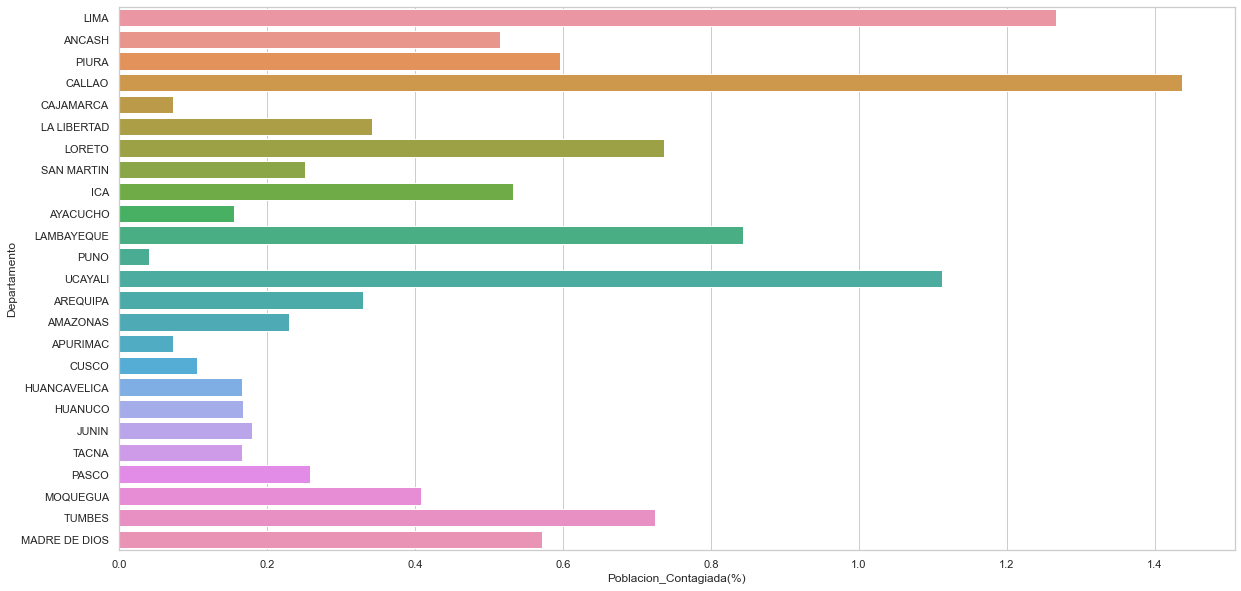

In [15]:
#Grafico de Barras: Porcentaje de contagiados por departamento
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
ax = sns.barplot(x="Poblacion_Contagiada(%)", y="Departamento", data=contagiados_departamentos)

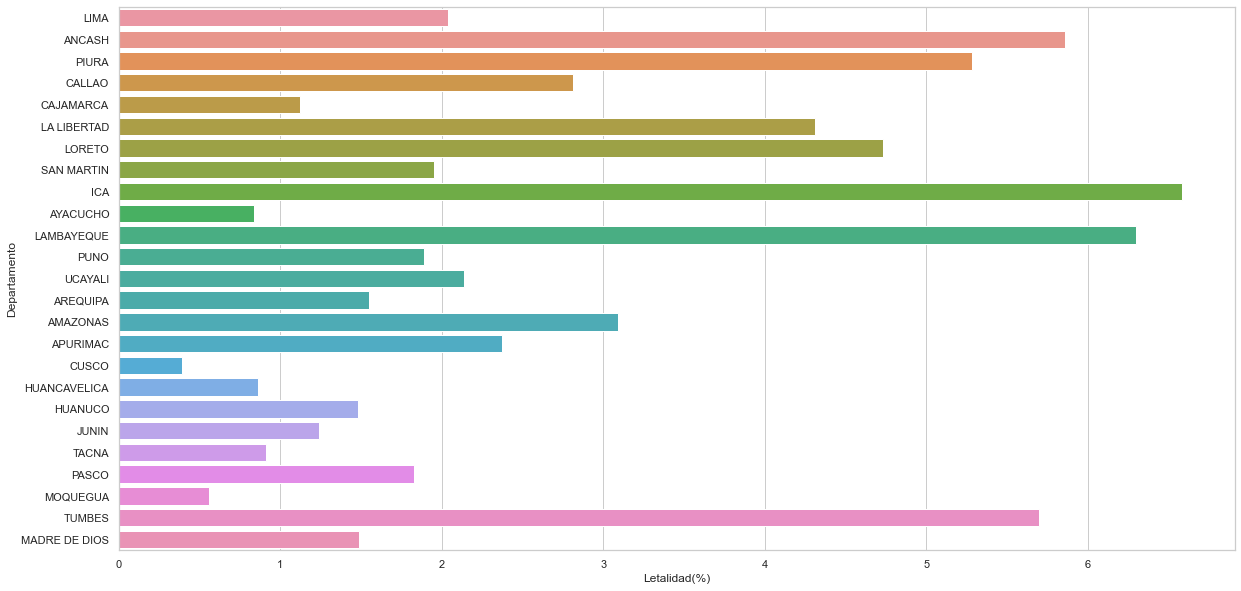

In [16]:
# Gráfico de Barras: Porcentaje de Letalidad por departamento.
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
ax = sns.barplot(x="Letalidad(%)", y="Departamento", data=letalidad_departamentos)

## 3. Visualización Dinámica.
Trabajamos en una segunda versión de la visualización de los datos para presentarlos utilizando mejores herramientas de visualización. Para esta sección, se decidió presentar únicamente el porcentaje de Letalidad por cada departamento utilizando dos vistas: **i)Mapa del Perú**, **ii)Gráfico de Barras por departamento**.

In [17]:
#Unimos ambos datasets para tener la información geográfica de los departamentos y la información correspondiente a la letalidad.
pd_dep = pd.merge(contagiados_departamentos, df_departamentos, on='Departamento', how='inner')
pd_fall_pos_dep = pd.merge(pd_dep, letalidad_departamentos, on='Departamento', how='inner')
print("Departamentos:", pd_fall_pos_dep.Departamento.count())

Departamentos: 25


In [18]:
pd_fall_pos_dep.head()

Departamento  Cantidad_Positivos  Poblacion_Contagiada(%)   LATITUDE  \
0         LIMA              120183                 1.267031 -12.045662   
1       ANCASH                5582                 0.515173  -9.530114   
2        PIURA               11067                 0.596023  -5.197222   
3       CALLAO               14284                 1.436308 -12.063433   
4    CAJAMARCA                 984                 0.073377  -7.157271   

   LONGITUDE FIRST_IDDP  POBLACION  Cantidad_Fallecidos  Letalidad(%)  
0 -77.030570         15    9485405                 2449          2.04  
1 -77.528718         02    1083519                  327          5.86  
2 -80.626649         20    1856809                  584          5.28  
3 -77.147186         07     994494                  401          2.81  
4 -78.517485         06    1341012                   11          1.12

Utilizamos el **i) Mapa del Perú** coloreado con diferentes intensidades de rojo dependiendo del porcentaje de letalidad. Donde mayor intensidad significa mayor cantidad de fallecidos por total de contagiados. De esta forma podemos **mostrar de forma simple y rápida la información de letalidad**. Por ejemplo, es visualmente fácil para un espectador determinar que la zona norte es la más afectada, y que los departamentos con mayor porcentaje de letalidad son: Lambayeque, Ancash e Ica.
El **mapa implementado con Plotly** y graficado gracias al **GeoJson** armado por https://github.com/juaneladio/peru-geojson nos permite interactuar con él y verificar el porcentaje exacto de letalidad y el departamento asociado.

In [19]:
#Mapa del Perú:
import plotly.express as px
with open('geojson/peru_departamental_simple.geojson') as response:
    peru_geo = json.load(response)
    
fig = px.choropleth(pd_fall_pos_dep, geojson=peru_geo, color="Letalidad(%)",color_continuous_scale="Reds",
                    locations="Departamento", featureidkey="properties.NOMBDEP")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text = 'Porcentaje de Letalidad PERU - COVID19')
fig.show()

Utilizamos el **ii) Gráfico de Barras** para comparar la tasa de letalidad entre departamentos. Además, coloreamos siempre la barra correspondiente al departamento con mayor porcentaje de letalidad. Implementado en Dash, nos permite definir qué departamentos queremos ingresar a la gráfica para comparar sus valores. De esta forma podemos **tener un mayor detalle sobre la diferencia entre valores de letalidad de los departamentos que uno decida según necesidad o gusto**.

In [20]:
#Gráfico de Barras:
xs = pd_fall_pos_dep["Departamento"]
ys = pd_fall_pos_dep["Letalidad(%)"]
max_value = max(ys)
colors = []
for i in range(len(ys)):
    colors.append('lightslategrey')
    if (ys[i] == max_value):
        max_index = i
colors[max_index] = "crimson"   
figure = go.Figure(go.Bar(x=xs, y=ys,marker_color=colors))
figure.update_layout(title='Porcentaje de Letalidad Perú - COVID19')
figure.update_traces(texttemplate='%{text:.2s}')
figure.show()

In [21]:
#Exportamos el archivo CSV con la información trabajada para leerla directamente desde el aplicativo Web.
pd_fall_pos_dep.to_csv("Letalidad_Departamento.csv", index=False)

## 4. Implementación Visual en DASH.
Para mostrar los dos gráficos trabajados en líneas superiores: **i)Mapa del Perú**, **ii)Gráfico de Barras por departamento**, se implementará en Dash.
El código a continuación hacer referencia al TAB # 1 que se encuentra en el aplicativo final. Se debe ejecutar con la carpeta "letalidad" en la misma ruta.

In [22]:
# Dash dependencies
import dash
import dash_html_components as html
from dash.dependencies import Input, Output, State

# Pandas dependencies
import pandas as pd

# Utils
from utils_vis import *

# Tabs
from letalidad.tab_letalidad import *
from letalidad.letalidad_data import *

#region Data
letalidad = LetalidadData()
data = letalidad.getInfo()
#endregion

#region Configuración Dash
app = dash.Dash(
    __name__,
    meta_tags=[{'name': 'viewport', 'content': 'width=device-width, initial-scale=1.0' }],
)
app.config['suppress_callback_exceptions'] = True
#endregion

#region Creación de Layout
create_title(app, 'Proyecto de Visualización de Datos')

app.layout = html.Div(
    id='root',
    children=[
        html.Div(id='header', children=create_header(app)),
        html.Div(id='container', children=[html.Div(className='row', children=create_tabs())])
    ]
)
#region Callback Tabs
@app.callback(Output('tabs-content','children'),
              [Input('tabs','value')])
def render_tabs(tab):
    if tab == 'tab1':
        return create_barplot(letalidad.getDepartments(), data)
    elif tab == 'tab2':
        return html.Div([html.H4('Tab 2 Content')])
    elif tab == 'tab3':
        return html.Div([html.H4('Tab 3 Content')])
    elif tab == 'tab4':
        return html.Div([html.H4('Tab 4 Content')])
    elif tab == 'tab5':
        return html.Div([html.H4('Tab 5 Content')])                

@app.callback(Output('graph_bar', 'figure'),
              [Input('dd-dep-plot', 'value')])
def render_letalidad(deps):
    data = letalidad.getInfo(deps)
    return create_barplot_layout(data)

app.run_server(debug=True, use_reloader=False) 

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
